# Contexto de la Base de Datos
El contexto de la Base de Datos está relacionado con la calidad de sueño que poseen cierto grupo de individuos tomando en cuenta algunos hábitos de estos para su análisis

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Descripción de Aproximación
Aproximación por Proximidad




In [42]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px
import random
#Se agregarán más en cuanto avance el temario de clase


In [43]:
df = pd.read_csv("/content/drive/MyDrive/EstadisticaProyecto/CalidadSueño/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [44]:
#limites del dataset son [0,373]

tam_muestra = 131
sueño = df.sample(n=tam_muestra, random_state=42) #es una muestra aleatoria de 131 registros

# Objetivo del estudio del DataSet

El objetivo del estudio de este conjunto de datos es observar que características comparten los individuos que tienen
una mala o pobre calidad  de sueño. Me gustaría identificar cuales son los atributos que más influyen negativamente a la calidad de sueño de una persona y intentar identificar las causas principales que afectan al sueño.

### Explicacion de las Variables:

# **Categoria:**

Gender: Representa el género de la persona. Puede tener dos categorías: masculino y femenino, que son las opciones típicas para esta variable.

Occupation: Es la ocupación o profesión de la persona. Puede tener diferentes categorías, como médico, estudiante, ingeniero, etc. Dependiendo de la naturaleza de tus datos, es posible que necesites especificar las categorías exactas presentes en tu dataset.

Quality of Sleep: Es una medida subjetiva de la calidad del sueño de la persona. Puede ser una escala numérica o una categoría, como "buena", "regular" o "mala".

Stress Level: Representa el nivel de estrés percibido por la persona. Al igual que la calidad del sueño, puede ser una escala numérica o una categoría descriptiva.

BMI Category: Se refiere a la categoría del índice de masa corporal (IMC) de la persona. El IMC se calcula utilizando la altura y el peso de una persona y se utiliza para evaluar si tiene un peso saludable. Las categorías comunes incluyen bajo peso, peso normal, sobrepeso y obesidad.

Sleep Disorder: Es una variable binaria que indica si la persona tiene o no un trastorno del sueño. Puede ser representada como "sí" o "no".

Age: Indica la edad de la persona en años. Esta variable es numérica y puede variar en un rango continuo.

# **Numericas:**

Sleep Duration: Representa la duración del sueño de la persona. Puede estar en minutos u horas, dependiendo de cómo se haya registrado en tu dataset.

Physical Activity Level: Indica el nivel de actividad física de la persona. Puede tener diferentes categorías, como sedentario, moderado o activo, o puede representarse con valores numéricos que reflejen la intensidad de la actividad física.

Blood Pressure: Indica la presión arterial de la persona. Puede estar compuesta por dos valores: presión arterial sistólica y diastólica. Por ejemplo, 120/80 mmHg, donde 120 es la presión arterial sistólica y 80 es la presión arterial diastólica.

Heart Rate: Representa la frecuencia cardíaca de la persona en reposo. Se mide en latidos por minuto (bpm).

Daily Steps: Indica el número de pasos que la persona realiza en un día. Puede utilizarse como medida de la actividad física o nivel de movimiento.

Blood Pressure Num: Es una representación numérica de la presión arterial de la persona, en lugar de tener dos valores separados para la presión arterial sistólica y diastólica. Esto puede ser útil para realizar análisis numéricos más avanzados.

# Medidas de Dispersión

In [45]:
sueño.describe()
sueño.nunique()

Person ID                  131
Gender                       2
Age                         27
Occupation                   9
Sleep Duration              25
Quality of Sleep             6
Physical Activity Level     11
Stress Level                 6
BMI Category                 4
Blood Pressure              14
Heart Rate                  10
Daily Steps                 11
Sleep Disorder               3
dtype: int64

In [46]:
sueño.describe(exclude = np.number)

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,131,131,131,131,131
unique,2,9,4,14,3
top,Male,Nurse,Normal,130/85,None
freq,73,28,69,37,73


In [47]:
sueño.nunique()

Person ID                  131
Gender                       2
Age                         27
Occupation                   9
Sleep Duration              25
Quality of Sleep             6
Physical Activity Level     11
Stress Level                 6
BMI Category                 4
Blood Pressure              14
Heart Rate                  10
Daily Steps                 11
Sleep Disorder               3
dtype: int64

In [48]:
sueño.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 329 to 338
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                131 non-null    int64  
 1   Gender                   131 non-null    object 
 2   Age                      131 non-null    int64  
 3   Occupation               131 non-null    object 
 4   Sleep Duration           131 non-null    float64
 5   Quality of Sleep         131 non-null    int64  
 6   Physical Activity Level  131 non-null    int64  
 7   Stress Level             131 non-null    int64  
 8   BMI Category             131 non-null    object 
 9   Blood Pressure           131 non-null    object 
 10  Heart Rate               131 non-null    int64  
 11  Daily Steps              131 non-null    int64  
 12  Sleep Disorder           131 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 14.3+ KB


In [49]:
hombres = sueño[sueño['Gender']=='Male']['Sleep Duration'].mean()
mujeres = sueño[sueño['Gender']=='Female']['Sleep Duration'].mean()
print(f'la media de la duracion de sueño de los hombres es de: {hombres:.2f}')
print(f'la media de la duracion de sueño de las mujeres es de: {mujeres:.2f}')


la media de la duracion de sueño de los hombres es de: 6.89
la media de la duracion de sueño de las mujeres es de: 7.37


In [50]:
hombres = sueño[sueño['Gender']=='Male']['Quality of Sleep'].mean()
mujeres = sueño[sueño['Gender']=='Female']['Quality of Sleep'].mean()
print(f'la media de la calidad de sueño de los hombres es de: {hombres:.2f}')
print(f'la media de la calidad de sueño de las mujeres es de: {mujeres:.2f}')

la media de la calidad de sueño de los hombres es de: 6.81
la media de la calidad de sueño de las mujeres es de: 7.78


In [51]:
hombres = sueño[sueño['Gender']=='Male']['Stress Level'].mean()
mujeres = sueño[sueño['Gender']=='Female']['Stress Level'].mean()
print(f'la media del nivel estrés de los hombres es de: {hombres:.2f}')
print(f'la media del nivel de estrés de las mujeres es de: {mujeres:.2f}')

la media del nivel estrés de los hombres es de: 6.32
la media del nivel de estrés de las mujeres es de: 4.52


In [52]:

hombres = sueño[sueño['Gender']=='Male']['Physical Activity Level'].mean()
mujeres = sueño[sueño['Gender']=='Female']['Physical Activity Level'].mean()
print(f'la media del nivel de actividad física de los hombres es de: {hombres:.2f}')
print(f'la media del nivel de actividad física de las mujeres es de: {mujeres:.2f}')

la media del nivel de actividad física de los hombres es de: 54.62
la media del nivel de actividad física de las mujeres es de: 58.36


In [53]:
# Definir una función para aplicar la transformación
def transformar_presion_arterial(presion_arterial):
    valores = presion_arterial.split('/')
    presion_sistolica = float(valores[0])
    presion_diastolica = float(valores[1])
    resultado = presion_sistolica / presion_diastolica
    return resultado

# Aplicar la transformación a toda la columna
sueño['Blood Pressure Num'] = sueño['Blood Pressure'].apply(transformar_presion_arterial)

#Comprobar que se creo la nueva columna
sueño.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 329 to 338
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                131 non-null    int64  
 1   Gender                   131 non-null    object 
 2   Age                      131 non-null    int64  
 3   Occupation               131 non-null    object 
 4   Sleep Duration           131 non-null    float64
 5   Quality of Sleep         131 non-null    int64  
 6   Physical Activity Level  131 non-null    int64  
 7   Stress Level             131 non-null    int64  
 8   BMI Category             131 non-null    object 
 9   Blood Pressure           131 non-null    object 
 10  Heart Rate               131 non-null    int64  
 11  Daily Steps              131 non-null    int64  
 12  Sleep Disorder           131 non-null    object 
 13  Blood Pressure Num       131 non-null    float64
dtypes: float64(2), int64(7),

In [54]:
hombres = sueño[sueño['Gender']=='Male']['Blood Pressure Num'].mean()
mujeres = sueño[sueño['Gender']=='Female']['Blood Pressure Num'].mean()
print(f'la media de la presión sangrínea  en los hombres es de: {hombres:.2f}')
print(f'la media de la presión sangrínea  en las mujeres es de: {mujeres:.2f}')

la media de la presión sangrínea  en los hombres es de: 1.53
la media de la presión sangrínea  en las mujeres es de: 1.51


Las mujeres tienen mejor puntuacion que los hombres en todos los campos que se realizo un estudio. Esto quiza se debe a que la muestra es muy pequeña y quiza, la al haber más cantidad de hombres la muestra este sesgada, de lo contrario esto nos dice que las mujeres de esta muestra tienen una vida más saludable que los hombres, ya que tienen menos estres, menos presión sangrínea, más actividad física y mejor calidad y cantidad de sueño.

In [55]:
mujeres = sueño[sueño['Gender']=='Female']['Occupation'].value_counts().head(5).index
hombres = sueño[sueño['Gender']=='Male']['Occupation'].value_counts().head(5).index
print(mujeres)
print(hombres)


Index(['Nurse', 'Engineer', 'Accountant', 'Teacher', 'Lawyer'], dtype='object')
Index(['Doctor', 'Lawyer', 'Salesperson', 'Engineer', 'Software Engineer'], dtype='object')


Index(['Nurse', 'Doctor', 'Lawyer', 'Engineer', 'Salesperson'], dtype='object')


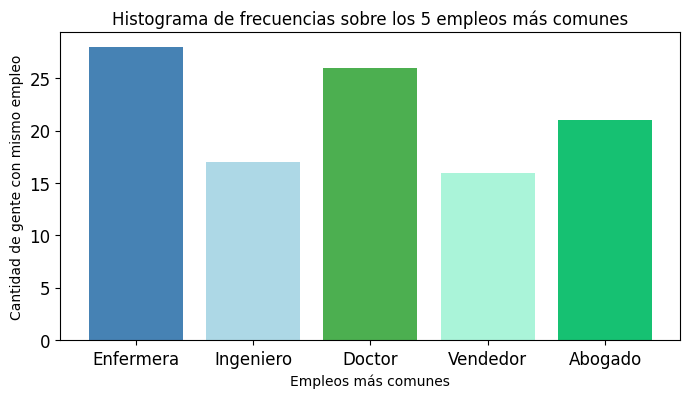

In [56]:
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias sobre los 5 empleos más comunes')

Empleos = sueño['Occupation'].value_counts().head(5).index
print(Empleos)
Nurse = sueño[sueño['Occupation']=='Nurse'].value_counts().sum()
Engineer = sueño[sueño['Occupation']=='Engineer'].value_counts().sum()
Doctor = sueño[sueño['Occupation']=='Doctor'].value_counts().sum()
Salesman = sueño[sueño['Occupation']=='Salesperson'].value_counts().sum()
Lawyer = sueño[sueño['Occupation']=='Lawyer'].value_counts().sum()

plt.bar(['Enfermera', 'Ingeniero', 'Doctor', 'Vendedor' , 'Abogado'],
        [Nurse, Engineer ,Doctor, Salesman, Lawyer]
       , color=['#4682B4', '#ADD8E6', '#4CAF50', '#AAF4D9', '#16C172'])

plt.xlabel('Empleos más comunes')
plt.ylabel('Cantidad de gente con mismo empleo')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Index(['None', 'Sleep Apnea', 'Insomnia'], dtype='object')


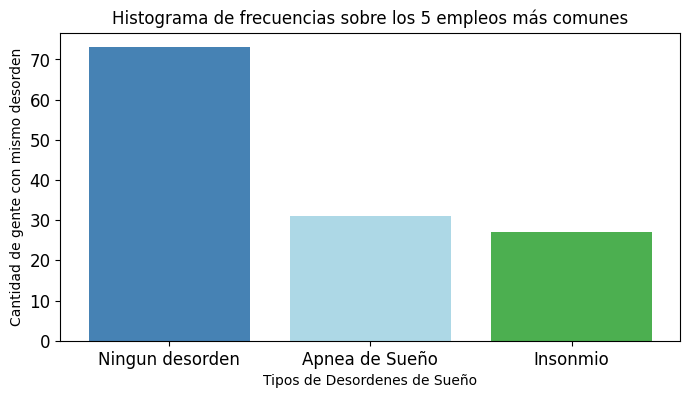

In [57]:
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias sobre los 5 empleos más comunes')
disorder = sueño['Sleep Disorder'].value_counts().head(5).index
print(disorder)
Ningun = sueño[sueño['Sleep Disorder']=='None'].value_counts().sum()
Apnea = sueño[sueño['Sleep Disorder']=='Sleep Apnea'].value_counts().sum()
Insomnia = sueño[sueño['Sleep Disorder']=='Insomnia'].value_counts().sum()
total = Ningun+ Apnea + Insomnia
plt.bar(['Ningun desorden', 'Apnea de Sueño', 'Insonmio'],
        [Ningun, Apnea ,Insomnia]
       , color=['#4682B4', '#ADD8E6', '#4CAF50'])

plt.xlabel('Tipos de Desordenes de Sueño')
plt.ylabel('Cantidad de gente con mismo desorden')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

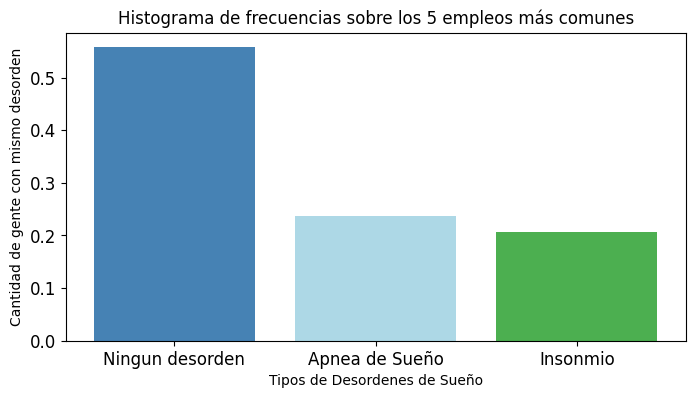

In [58]:
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias sobre los 5 empleos más comunes')

plt.bar(['Ningun desorden', 'Apnea de Sueño', 'Insonmio'],
        [Ningun/total, Apnea/total ,Insomnia/total]
       , color=['#4682B4', '#ADD8E6', '#4CAF50'])

plt.xlabel('Tipos de Desordenes de Sueño')
plt.ylabel('Cantidad de gente con mismo desorden')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [59]:
sueño['Blood Pressure Num'].head()

329    1.5625
33     1.5625
15     1.5000
325    1.5625
57     1.5625
Name: Blood Pressure Num, dtype: float64

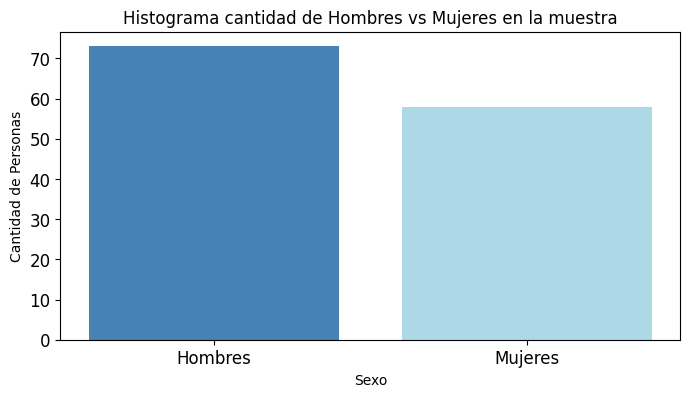

In [60]:
plt.figure(figsize=(8, 4))
plt.title('Histograma cantidad de Hombres vs Mujeres en la muestra')
hombrescant = sueño[sueño['Gender']=='Male'].value_counts().sum()
mujerescant = sueño[sueño['Gender']=='Female'].value_counts().sum()
total = hombrescant + mujerescant
plt.bar(['Hombres', 'Mujeres'],
        [hombrescant, mujerescant]
       , color=['#4682B4', '#ADD8E6'])

plt.xlabel('Sexo')
plt.ylabel('Cantidad de Personas')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


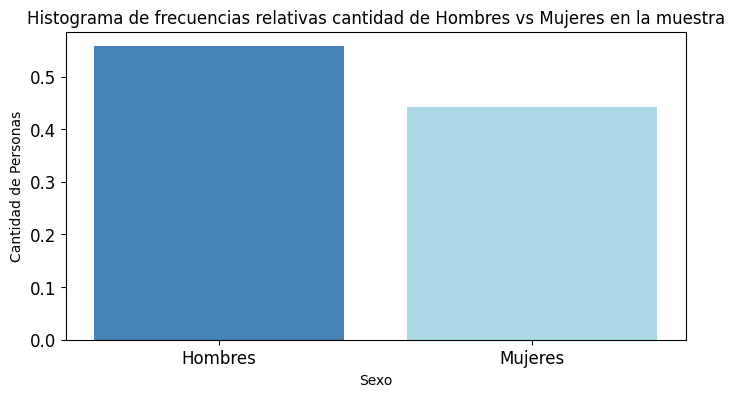

In [61]:
plt.figure(figsize=(8, 4))
plt.title('Histograma de frecuencias relativas cantidad de Hombres vs Mujeres en la muestra')

plt.bar(['Hombres', 'Mujeres'],
        [hombrescant/total, mujerescant/total]
       , color=['#4682B4', '#ADD8E6'])

plt.xlabel('Sexo')
plt.ylabel('Cantidad de Personas')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [62]:
#!pip install ydata_profiling

In [63]:
#import ydata_profiling
#ydata_profiling.ProfileReport(sueño)

In [64]:
factor = list(sueño.loc[:,sueño.nunique() < 10]);

sueño[factor] = sueño[factor].astype('category')

sueño.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 329 to 338
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                131 non-null    int64   
 1   Gender                   131 non-null    category
 2   Age                      131 non-null    int64   
 3   Occupation               131 non-null    category
 4   Sleep Duration           131 non-null    float64 
 5   Quality of Sleep         131 non-null    category
 6   Physical Activity Level  131 non-null    int64   
 7   Stress Level             131 non-null    category
 8   BMI Category             131 non-null    category
 9   Blood Pressure           131 non-null    object  
 10  Heart Rate               131 non-null    int64   
 11  Daily Steps              131 non-null    int64   
 12  Sleep Disorder           131 non-null    category
 13  Blood Pressure Num       131 non-null    float64 
dtypes: categ

In [65]:
def obtener_variables(dataset):

    variables = list(dataset.columns)

    return variables

lista_variables = obtener_variables(sueño)

print("Lista de variables:")

for variable in lista_variables:

    print(variable)

Lista de variables:
Person ID
Gender
Age
Occupation
Sleep Duration
Quality of Sleep
Physical Activity Level
Stress Level
BMI Category
Blood Pressure
Heart Rate
Daily Steps
Sleep Disorder
Blood Pressure Num


In [66]:
sueño['Sleep Disorder'] = sueño['Sleep Disorder'].map({'Sleep Apnea': 1, 'Insomnia': 1, 'None': 0})


Juntamos los 2 desordenes del sueño para obtener 1 o 0 para si tienen desorden o no

In [67]:
sueño['Sleep Disorder'] = sueño['Sleep Disorder'].apply(lambda x: 1 if x in ['Sleep Apnea', 'Insomnia'] else 0)
sueño.nunique()

Person ID                  131
Gender                       2
Age                         27
Occupation                   9
Sleep Duration              25
Quality of Sleep             6
Physical Activity Level     11
Stress Level                 6
BMI Category                 4
Blood Pressure              14
Heart Rate                  10
Daily Steps                 11
Sleep Disorder               1
Blood Pressure Num          13
dtype: int64

In [68]:
varObjBin = sueño['Quality of Sleep']
imputsleep = sueño.drop(['Person ID','Blood Pressure','Quality of Sleep'],axis=1)
imputsleep.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 329 to 338
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   131 non-null    category
 1   Age                      131 non-null    int64   
 2   Occupation               131 non-null    category
 3   Sleep Duration           131 non-null    float64 
 4   Physical Activity Level  131 non-null    int64   
 5   Stress Level             131 non-null    category
 6   BMI Category             131 non-null    category
 7   Heart Rate               131 non-null    int64   
 8   Daily Steps              131 non-null    int64   
 9   Sleep Disorder           131 non-null    int64   
 10  Blood Pressure Num       131 non-null    float64 
dtypes: category(4), float64(2), int64(5)
memory usage: 9.6 KB


In [69]:
def redondear_y_convertir_entero(df, columna):
    imputsleep['Blood Pressure Num'] = imputsleep['Blood Pressure Num'].round().astype(int)
    return df
sueño['Stress Level'].astype(int)
imputsleep['Sleep_Duration'] = imputsleep['Sleep Duration'].round()
sueño['quality_aleep'] = sueño['Quality of Sleep'].astype(int)
sueño['quality_aleep'] = sueño['quality_aleep'].round()
sueño['quality_aleep'].value_counts()
sueño['quality_sleep'] = sueño['quality_aleep'].apply(lambda x: 1 if x > 6 else 0)
sueño = sueño.drop(['quality_aleep'], axis = 1)
sueño.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 329 to 338
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                131 non-null    int64   
 1   Gender                   131 non-null    category
 2   Age                      131 non-null    int64   
 3   Occupation               131 non-null    category
 4   Sleep Duration           131 non-null    float64 
 5   Quality of Sleep         131 non-null    category
 6   Physical Activity Level  131 non-null    int64   
 7   Stress Level             131 non-null    category
 8   BMI Category             131 non-null    category
 9   Blood Pressure           131 non-null    object  
 10  Heart Rate               131 non-null    int64   
 11  Daily Steps              131 non-null    int64   
 12  Sleep Disorder           131 non-null    int64   
 13  Blood Pressure Num       131 non-null    float64 
 14  quality_

# Analisis de Correlacion
Primero calcular las correlaciones entre las variables para identificar posibles relaciones lineales entre ellas y la Calidad de Sueño. Las correlaciones te ayudarán a identificar qué características parecen estar más asociadas y ayudar a saber cuales afectan negativamente a la calidad de sueño.

In [70]:
imputsleep['aleatorio'] = np.random.uniform(0,1,size=sueño.shape[0])

imputsleep['aleatorio2'] = np.random.uniform(0,1,size=sueño.shape[0])

def cramers_v(var1, varObj):

    if not var1.dtypes == 'category':

        #bins = min(5,var1.value_counts().count())

        var1 = pd.cut(var1, bins = 5)

    if not varObj.dtypes == 'category': #np.issubdtype(varObj, np.number):

        #bins = min(5,varObj.value_counts().count())

        varObj = pd.cut(varObj, bins = 5)




    data = pd.crosstab(var1, varObj).values

    vCramer = stats.contingency.association(data, method = 'cramer')

    return vCramer

# Aplicar la función al input completo contra la objetivo

tablaCramer = pd.DataFrame(imputsleep.apply(lambda x: cramers_v(x,varObjBin)),columns=['VCramer'])

px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente al Transtorno del sueno').update_yaxes(categoryorder="total ascending")

/usr/local/lib/python3.10/dist-packages/scipy/stats/contingency.py:410: RuntimeWarning:

invalid value encountered in double_scalars



<ipython-input-71-90e272636a99>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



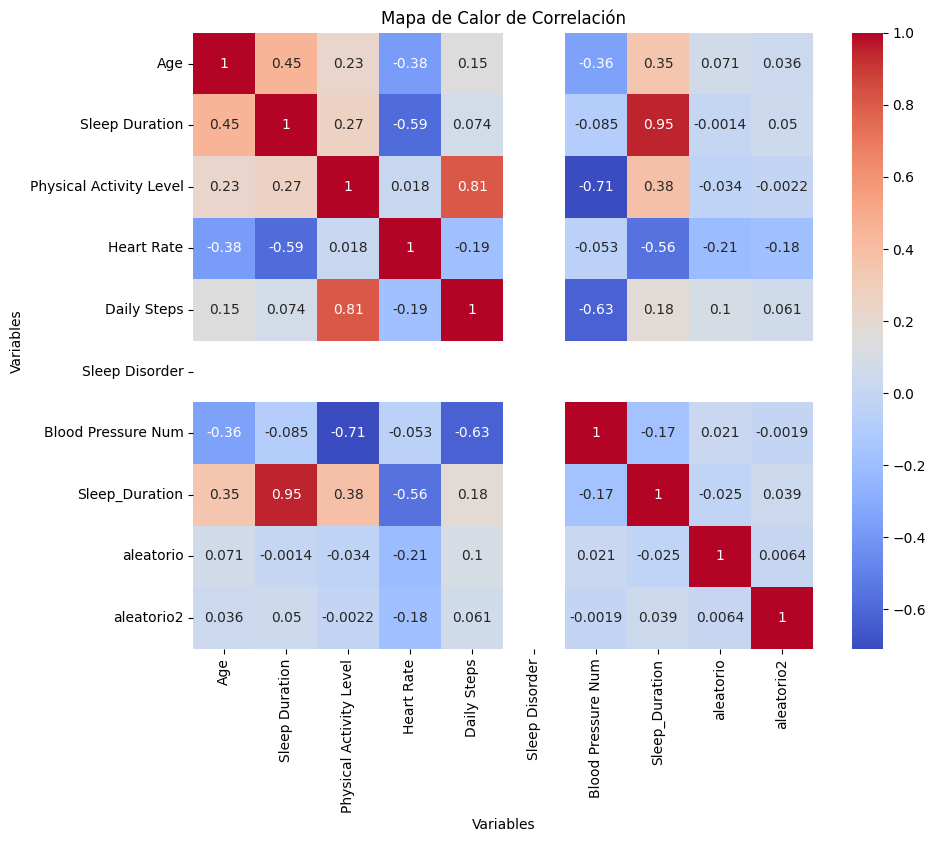

In [71]:
correlation_matrix = imputsleep.corr()  # Calcula la matriz de correlación
plt.figure(figsize=(10, 8))



# Generar el mapa de calor utilizando Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')



# Personalizar el mapa de calor
plt.title('Mapa de Calor de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')



# Mostrar el mapa de calor
plt.show()

La variable mas correlacionada a la variable objetivo seria la duracion del sueño.
Aparte cabe recalcar que el espacio en blanco de sleep disorder se debe a que esta es una categorica

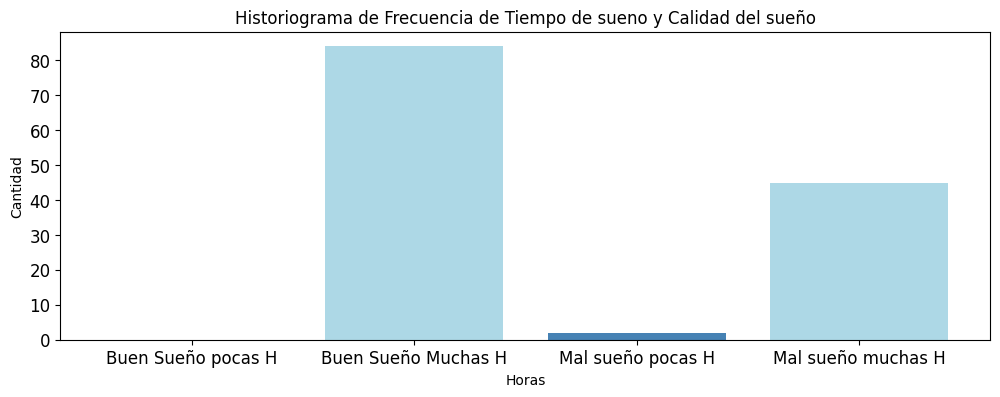

In [72]:
plt.figure(figsize=(12, 4))

plt.title('Historiograma de Frecuencia de Tiempo de sueno y Calidad del sueño')


imputsleep['Sleep_Duration'] = imputsleep['Sleep Duration'].round()


BuenoPocoH = len(sueño.loc[(sueño['Sleep Duration'] < 6) & (sueño['quality_sleep'] == 1)])
BuenoMuchoH = len(sueño.loc[(sueño['Sleep Duration'] >= 6) & (sueño['quality_sleep'] == 1)])

MaloPocoH = len(sueño.loc[(sueño['Sleep Duration'] < 6) & (sueño['quality_sleep'] == 0)])
MaloMuchoH = len(sueño.loc[(sueño['Sleep Duration'] >= 6) & (sueño['quality_sleep'] == 0)])




plt.bar(['Buen Sueño pocas H', 'Buen Sueño Muchas H', 'Mal sueño pocas H', 'Mal sueño muchas H'], [BuenoPocoH, BuenoMuchoH, MaloPocoH, MaloMuchoH], color=['#4682B4', '#ADD8E6'])




plt.xlabel('Horas')

plt.ylabel('Cantidad')

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)




plt.show()

Este histograma nos muestra el comportamiento de los pacientes registrados lo cualnos muestra que existen una gran diferencia entre las personas que duermen muchas horas con respecto a las personas que duermen muchas horas pero con mala calidad de sueño.

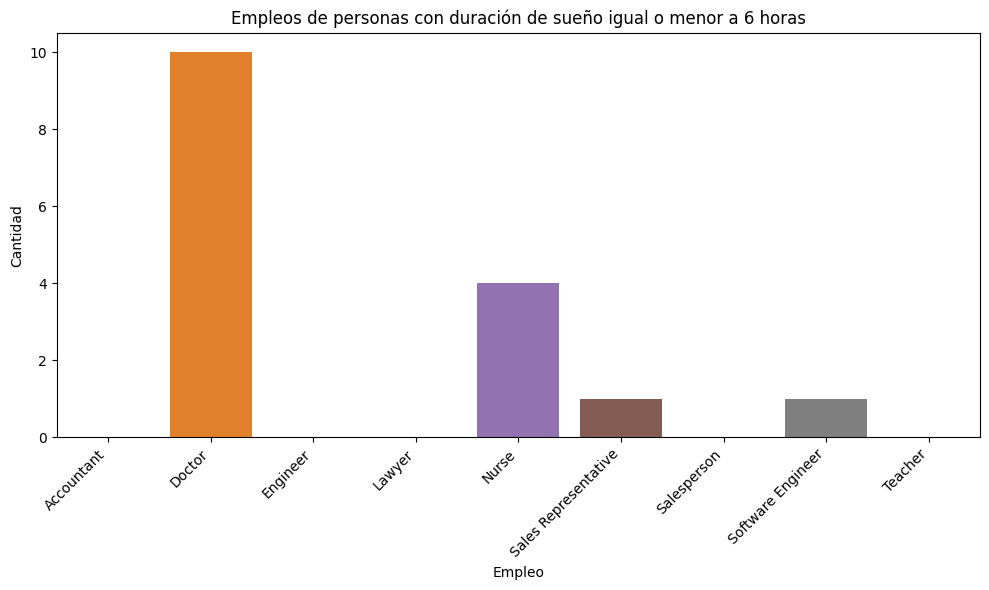

In [73]:
filtered_data = sueño[sueño['Sleep Duration'] <= 6]

# Crear un gráfico de conteo de los empleos
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Occupation')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Empleo')
plt.ylabel('Cantidad')
plt.title('Empleos de personas con duración de sueño igual o menor a 6 horas')
plt.tight_layout()
plt.show()

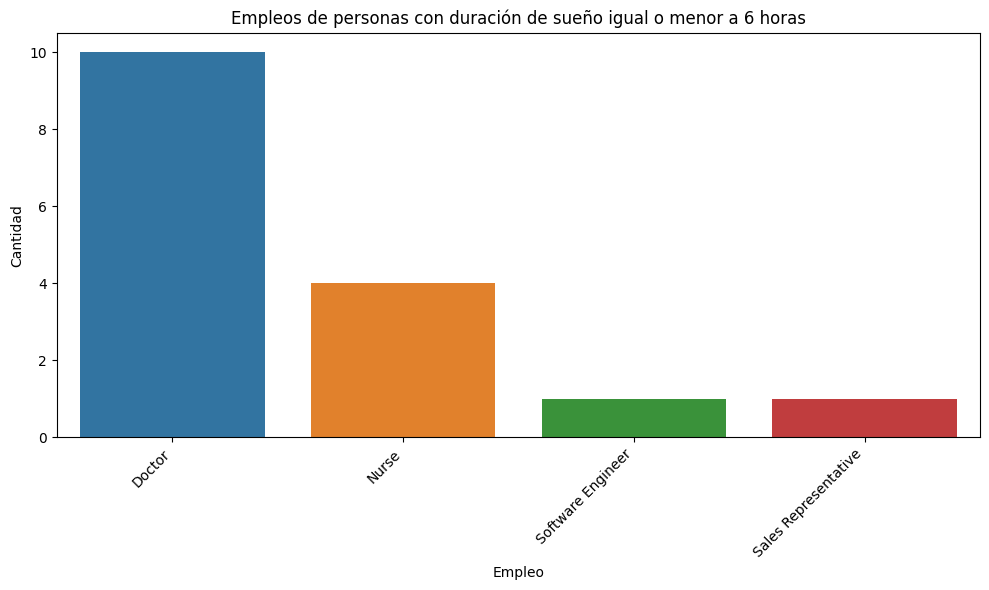

In [74]:
# Filtrar las personas con duración de sueño igual o menor a 6 horas
filtered_sueño = sueño[sueño['Sleep Duration'] <= 6]

# Obtener las ocupaciones con valores
occupations_with_values = filtered_sueño['Occupation'].unique()

# Filtrar el DataFrame original por las ocupaciones con valores
sueño_filtered_occupations = sueño[sueño['Occupation'].isin(occupations_with_values)]

# Filtrar nuevamente para excluir ocupaciones sin duración de sueño igual o menor a 6 horas
sueño_filtered_occupations = sueño_filtered_occupations[sueño_filtered_occupations['Sleep Duration'] <= 6]

# Crear un gráfico de conteo de los empleos
plt.figure(figsize=(10, 6))
sns.countplot(data=sueño_filtered_occupations, x='Occupation', order=occupations_with_values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Empleo')
plt.ylabel('Cantidad')
plt.title('Empleos de personas con duración de sueño igual o menor a 6 horas')
plt.tight_layout()
plt.show()





Este histograma nos muestra las ocupaciones con menores cantidades de horas de sueño, siendo esta la de doctor.

In [75]:
sueño['SleepDuration'] = sueño['Sleep Duration']
sueño['SleepDisorder'] = sueño['Sleep Disorder']
sueño.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 329 to 338
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                131 non-null    int64   
 1   Gender                   131 non-null    category
 2   Age                      131 non-null    int64   
 3   Occupation               131 non-null    category
 4   Sleep Duration           131 non-null    float64 
 5   Quality of Sleep         131 non-null    category
 6   Physical Activity Level  131 non-null    int64   
 7   Stress Level             131 non-null    category
 8   BMI Category             131 non-null    category
 9   Blood Pressure           131 non-null    object  
 10  Heart Rate               131 non-null    int64   
 11  Daily Steps              131 non-null    int64   
 12  Sleep Disorder           131 non-null    int64   
 13  Blood Pressure Num       131 non-null    float64 
 14  quality_

**Estudio Univariante**

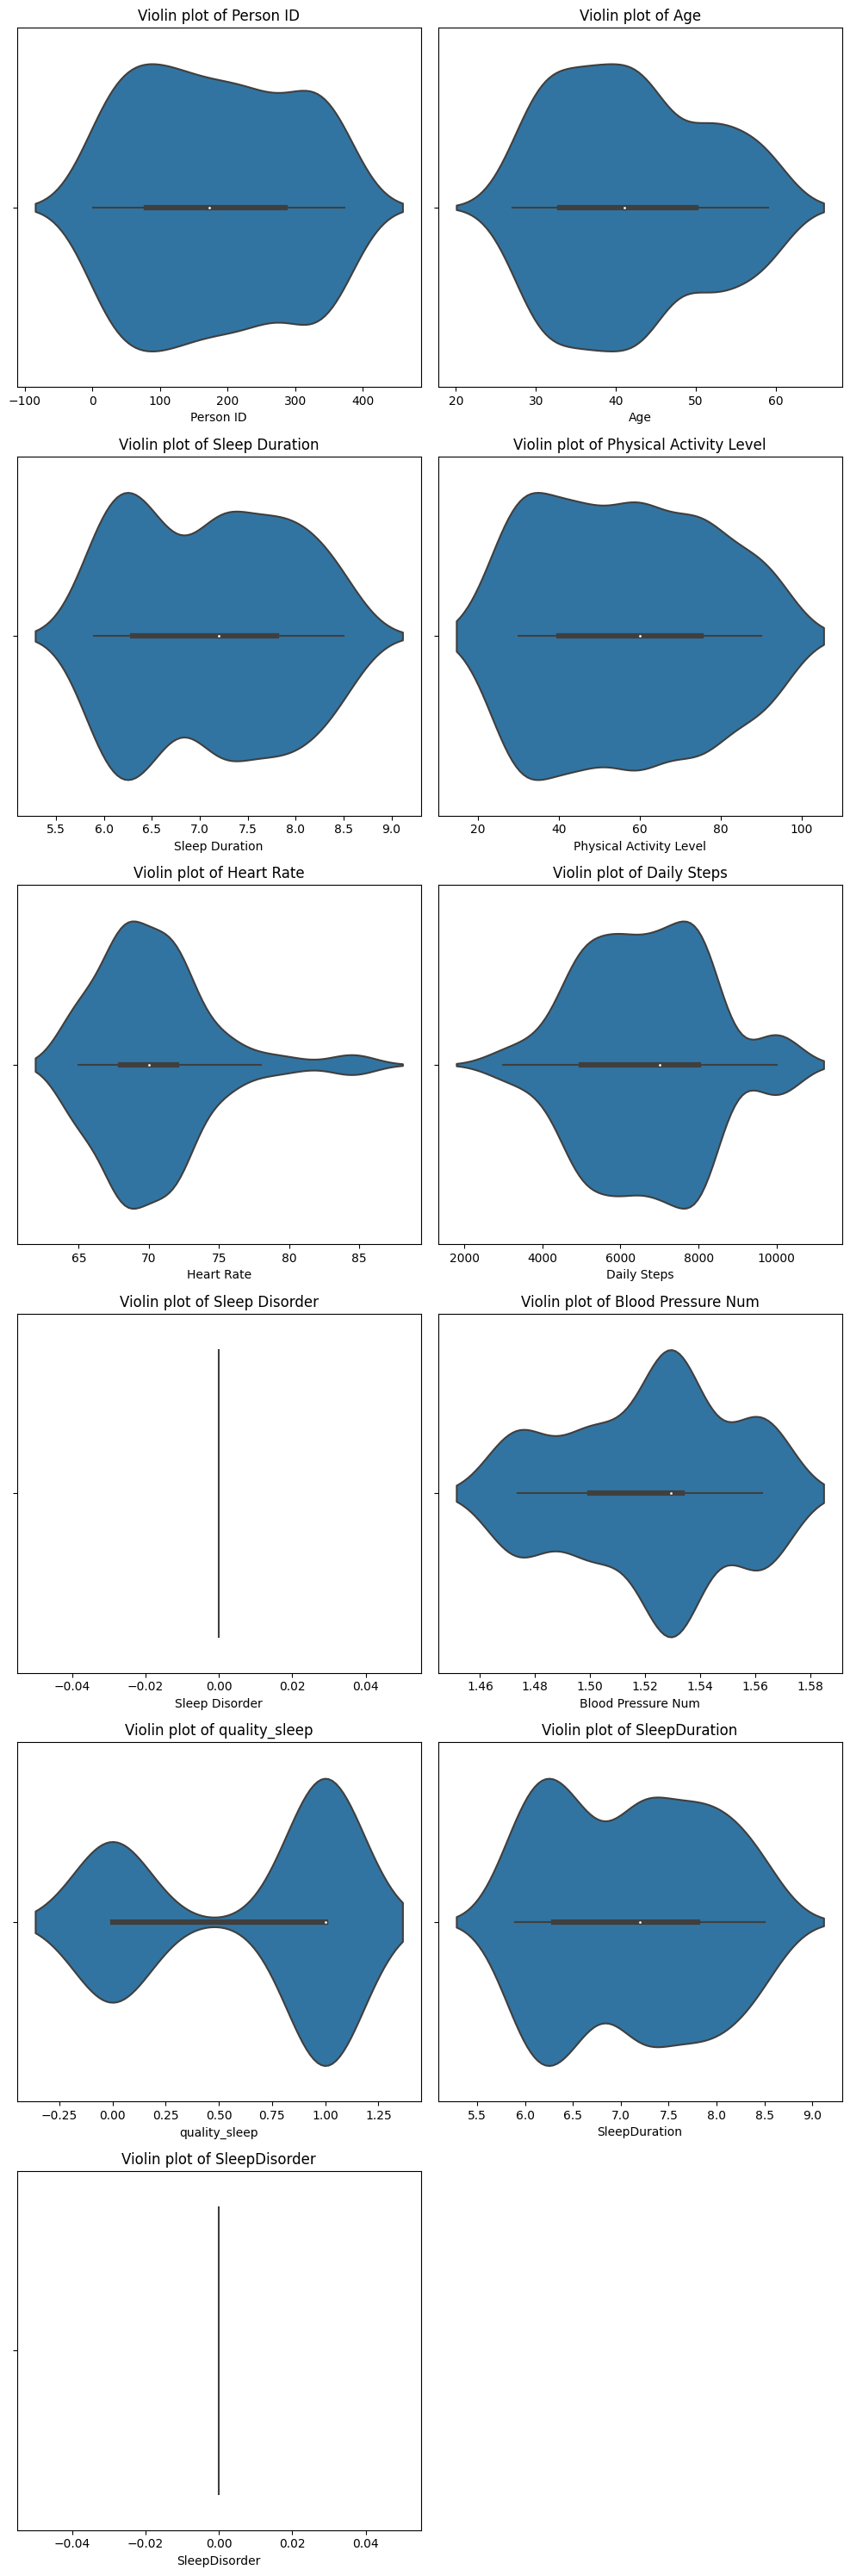

In [76]:
# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = sueño.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(x=sueño[column])
    plt.title(f'Violin plot of {column}')



plt.tight_layout()
plt.show()

<ipython-input-77-c367f3513202>:22: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-77-c367f3513202>:22: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



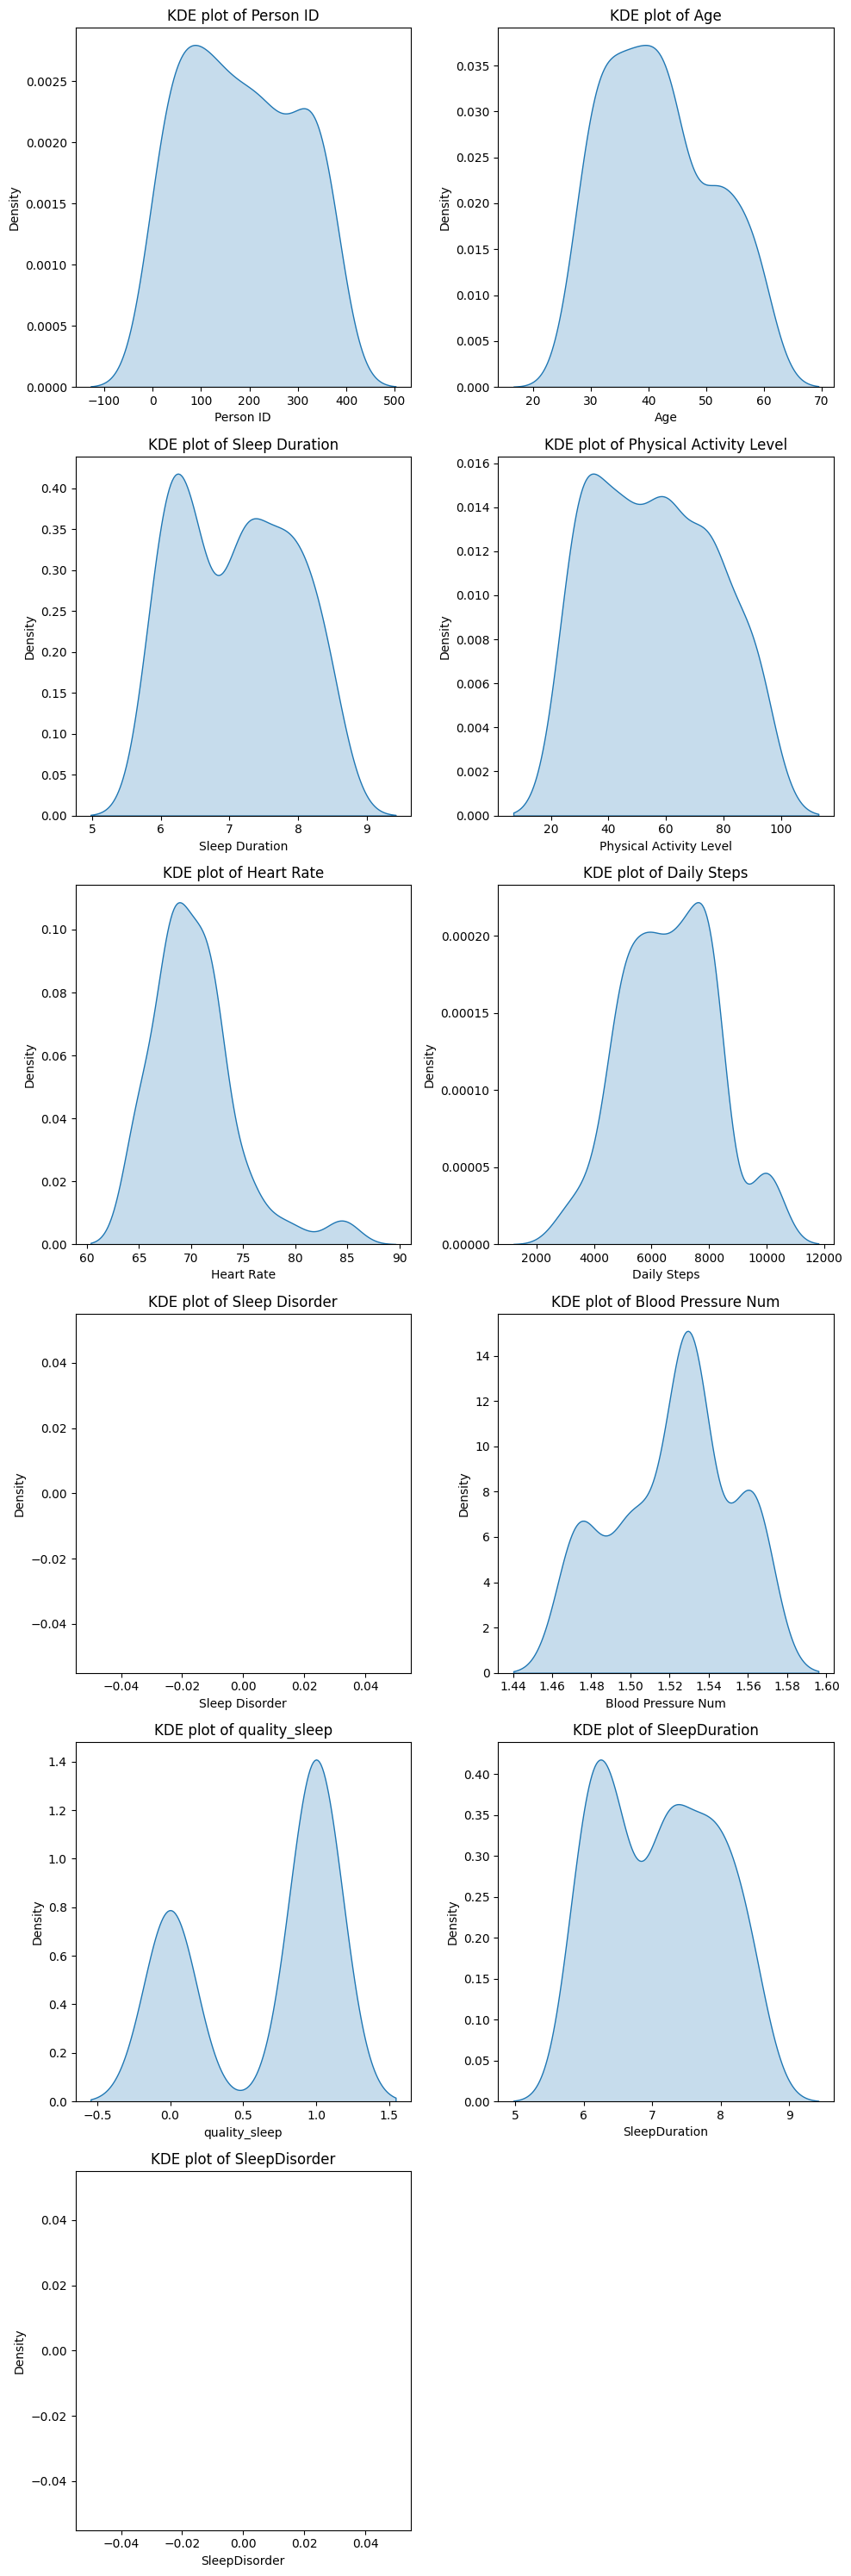

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt



# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = sueño.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=sueño[column], fill=True)
    plt.title(f'KDE plot of {column}')



plt.tight_layout()
plt.show()

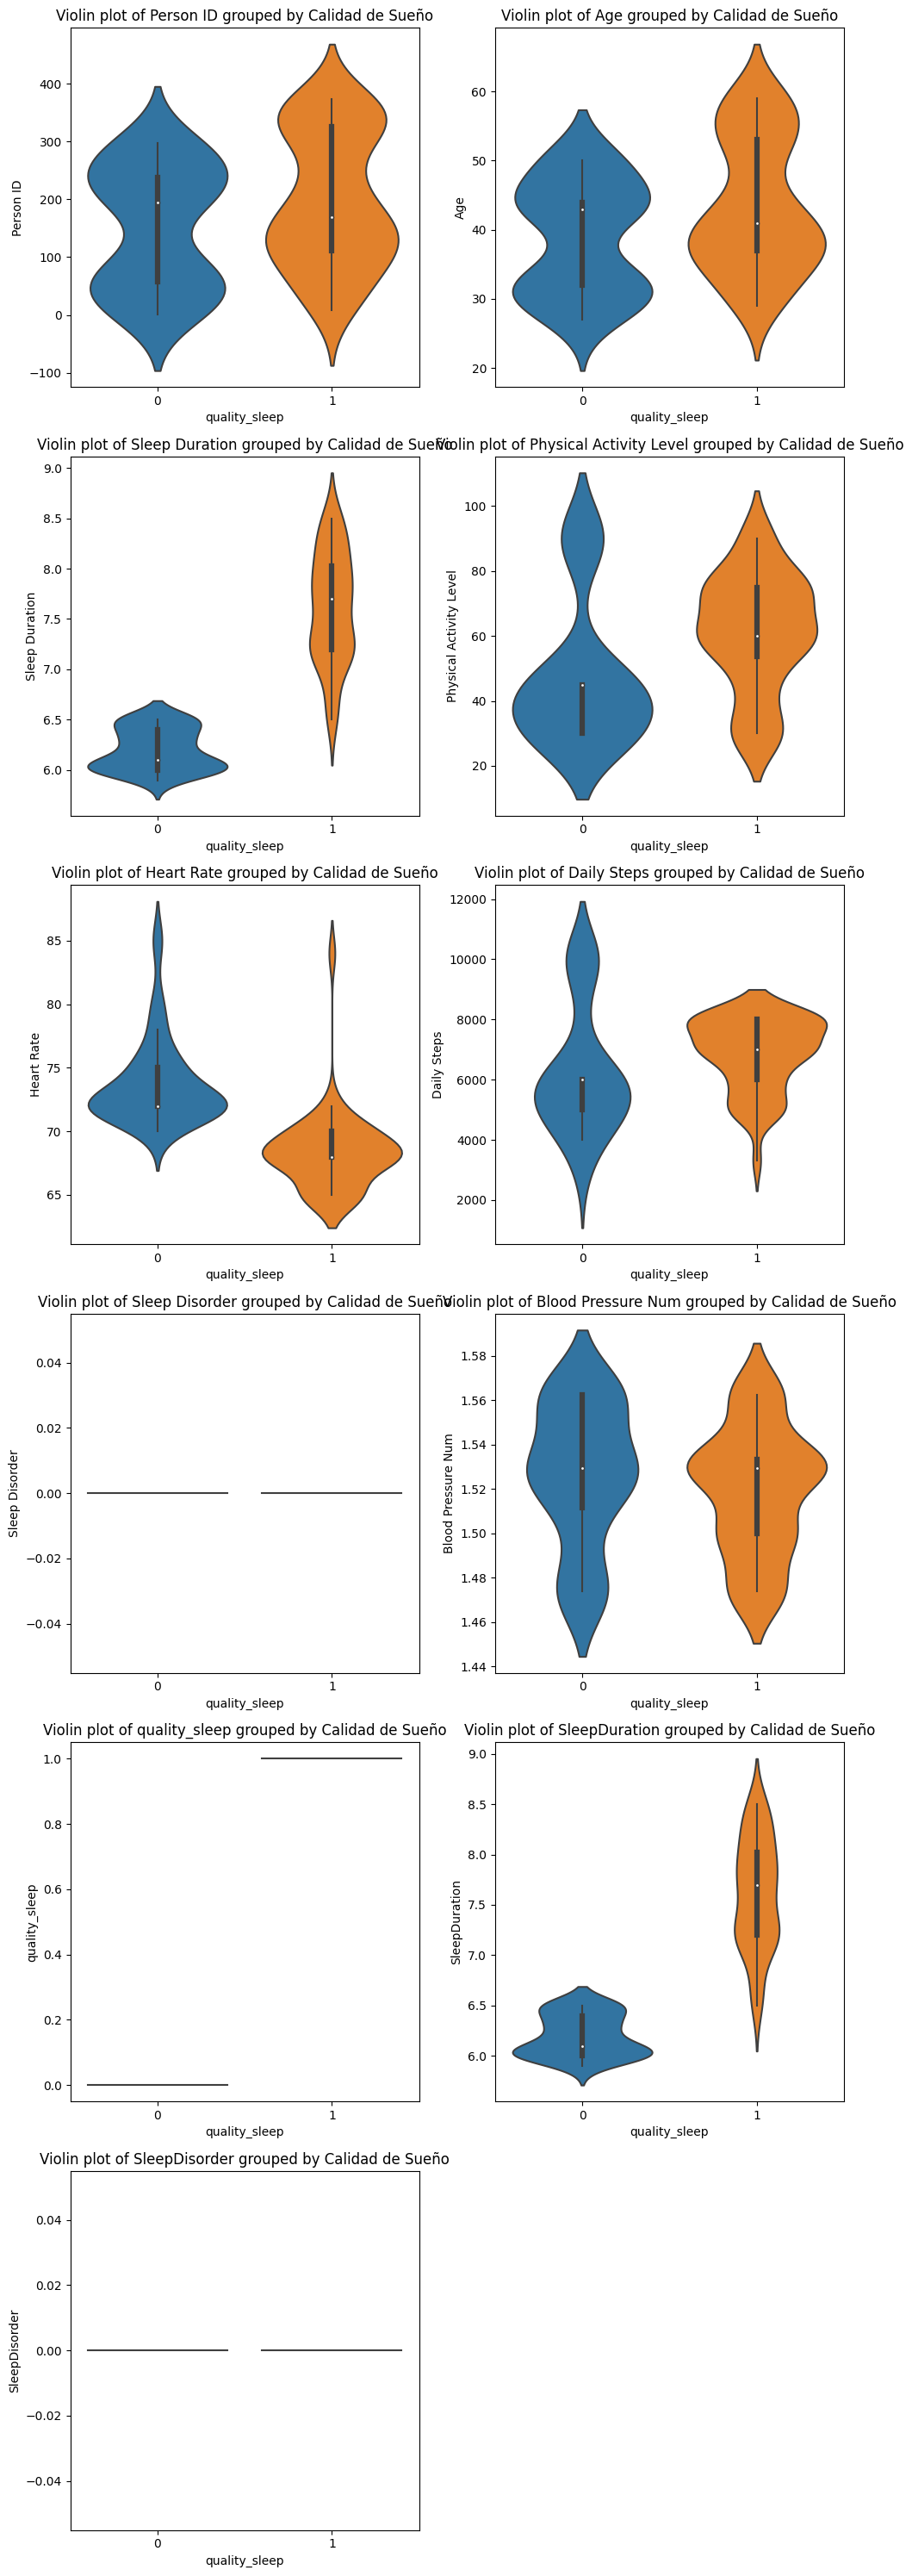

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt



# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = sueño.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(data=sueño, x='quality_sleep', y=column)
    plt.title(f'Violin plot of {column} grouped by Calidad de Sueño')



plt.tight_layout()
plt.show()

<ipython-input-79-e79123779bbe>:17: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-79-e79123779bbe>:18: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-79-e79123779bbe>:17: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-79-e79123779bbe>:18: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-79-e79123779bbe>:17: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-79-e79123779bbe>:18: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



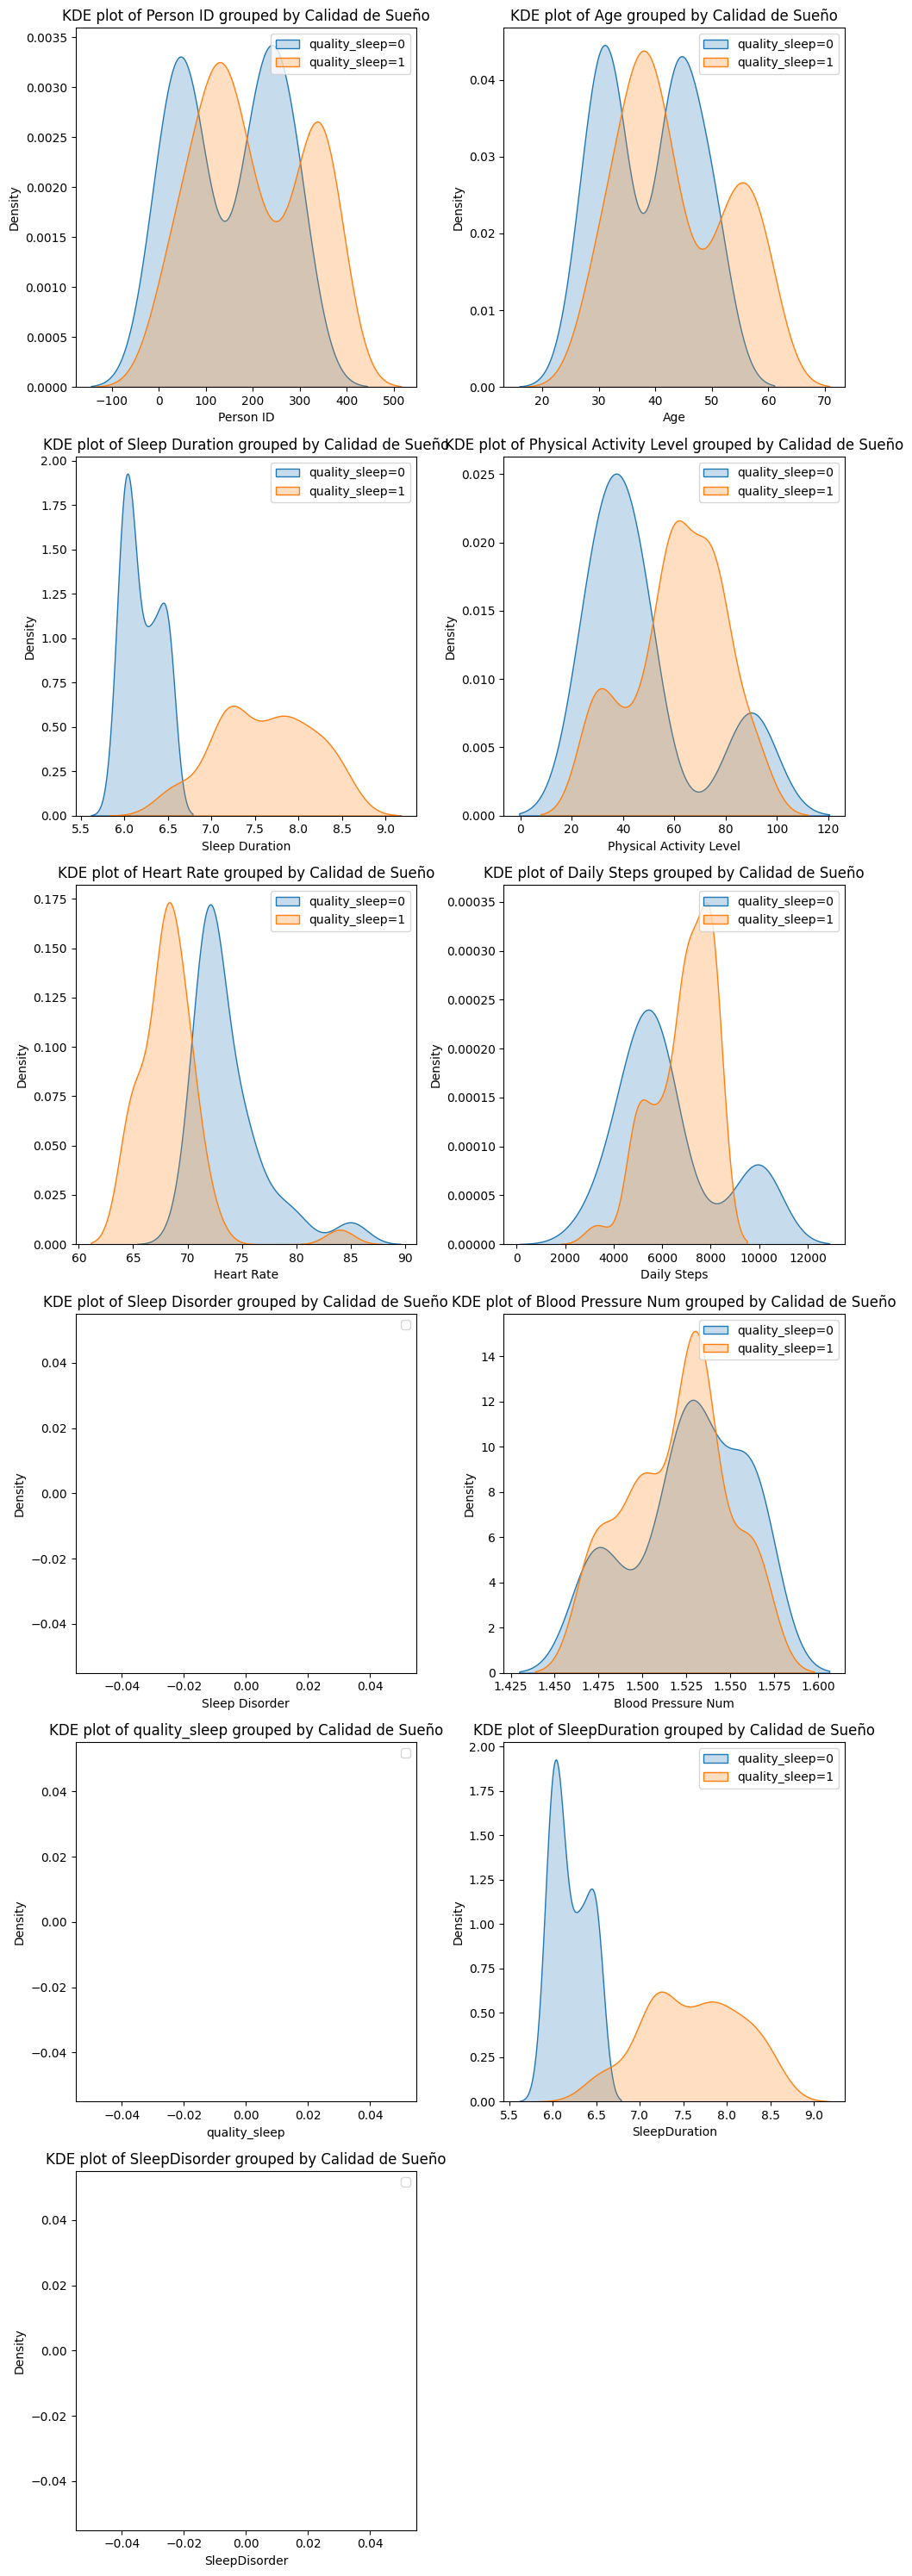

In [79]:
# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = sueño.select_dtypes(include=['float64', 'int64']).columns



num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2



plt.figure(figsize=(10, 5*num_rows))



for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=sueño[sueño['quality_sleep']==0][column], label='quality_sleep=0', fill=True)
    sns.kdeplot(data=sueño[sueño['quality_sleep']==1][column], label='quality_sleep=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by Calidad de Sueño')
    plt.legend()



plt.tight_layout()
plt.show()

# Interpretación Bivariante
## Sleep Duration VS Quality of Sleep
La grafica nos muestra que las personas con una mala calidad de sueno tienen una frecuencia mayor de dormir entre 5.5 y 6.5 horas mientras que las que tienen una buena calidad tienen una mayor frecuencia de 7 a 7.5 horas de sueno. Esto tiene sentido ya que con buena calidad de sueno mas horas tendras del mismo.

## Phisical Activity Level VS Quality of Sleep
La grafica nos muestra que las personas con una buena calidad de sueno tienden a tener un nivel de actividad fisica entre 55 y 65, comparado a los que tienen una calidad mala de sueno, a excepcion del grupo que tiene una actividad fisica entre 80 y 120, ya que estos aunque tengan una buen nivel de actividad poseen mala calidad por otros factores.



# Regresion Logistica Binaria

In [82]:

import statsmodels.api as sm
from sklearn.model_selection import train_test_split



# Obtener los datos (X e y) para la regresión logística binaria
X = sueño[['Sleep Duration']]
y = sueño['quality_sleep']



# Agregar una columna de unos a X para el intercepto del modelo
X = sm.add_constant(X)



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Ajustar el modelo de regresión logística binaria con statsmodels
model2 = sm.Logit(y_train, X_train)
result2 = model2.fit()



# Obtener el resumen del modelo
summary2 = result2.summary()



# Imprimir el resumen
print(summary2)

         Current function value: 0.048116
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          quality_sleep   No. Observations:                  104
Model:                          Logit   Df Residuals:                      102
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                  0.9261
Time:                        03:20:49   Log-Likelihood:                -5.0040
converged:                      False   LL-Null:                       -67.698
Covariance Type:            nonrobust   LLR p-value:                 4.184e-29
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1119.9173   9.93e+04     -0.011      0.991   -1.96e+05    1.93e+05
Sleep Duration   172.0817   1.53e+04      0.011      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



La r^2 de este modelo que lleva la variable objetivo vs la duracion del sueno tiene un valor muy cercano a 1 lo cual es bastante bueno para el ajuste del modelo, mientras que por otro lado su log_likehood tiene un valor de -5.

In [83]:

import statsmodels.api as sm
from sklearn.model_selection import train_test_split



# Obtener los datos (X e y) para la regresión logística binaria
X = sueño[['Physical Activity Level']]
y = sueño['quality_sleep']



# Agregar una columna de unos a X para el intercepto del modelo
X = sm.add_constant(X)



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Ajustar el modelo de regresión logística binaria con statsmodels
model2 = sm.Logit(y_train, X_train)
result2 = model2.fit()



# Obtener el resumen del modelo
summary2 = result2.summary()



# Imprimir el resumen
print(summary2)

Optimization terminated successfully.
         Current function value: 0.603710
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          quality_sleep   No. Observations:                  104
Model:                          Logit   Df Residuals:                      102
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                 0.07256
Time:                        03:21:21   Log-Likelihood:                -62.786
converged:                       True   LL-Null:                       -67.698
Covariance Type:            nonrobust   LLR p-value:                  0.001722
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.2037      0.620     -1.940      0.052      -2.420   

La r^2 de este modelo que lleva la variable objetivo vs el nivel de actividad fisica,tiene un valor de 0.72 lo cual es bastante bueno para el ajuste del modelo, mientras que por otro lado su log_likehood tiene un valor de -62.786 lo cual nos dice que tiene un peor ajuste con respecto al anterior modelo.

In [87]:

import statsmodels.api as sm
from sklearn.model_selection import train_test_split



# Obtener los datos (X e y) para la regresión logística binaria
X = sueño[['Sleep Duration', 'Age']]
y = sueño['quality_sleep']



# Agregar una columna de unos a X para el intercepto del modelo
X = sm.add_constant(X)



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Ajustar el modelo de regresión logística binaria con statsmodels
model2 = sm.Logit(y_train, X_train)
result2 = model2.fit()



# Obtener el resumen del modelo
summary2 = result2.summary()



# Imprimir el resumen
print(summary2)

         Current function value: 0.031075
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          quality_sleep   No. Observations:                  104
Model:                          Logit   Df Residuals:                      101
Method:                           MLE   Df Model:                            2
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                  0.9523
Time:                        03:23:25   Log-Likelihood:                -3.2318
converged:                      False   LL-Null:                       -67.698
Covariance Type:            nonrobust   LLR p-value:                 1.006e-28
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -217.0245     99.055     -2.191      0.028    -411.170     -22.879
Sleep Duration    24.0448     10.416      2.308      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



La r^2 de este modelo que lleva la variable objetivo vs el nivel de actividad fisica y la edad, estos tiene un valor muy cercano a 1 lo cual es bastante bueno para el ajuste del modelo, mientras que por otro lado su log_likehood tiene un valor de -3 teniendo este el mejor ajuste de entre los tres.

# Conclusion

Mediante este analisis pude definir y averiguar los factores que afectan a la caliad de sueno y con ello los que pueden afectar de manera negativa y que aunque poseas buenos habitos, aun asi puedes tener una mala calidad de sueno por otros factores fisiologicos o psicologicos que esten mal.